In [13]:
from astropy.io import fits
from astropy.table import Table
import astropy.table as table

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib

from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.utils.data import get_pkg_data_filename

from astropy.coordinates import SkyCoord

import string
#Notice: in order to save figures as a .jpg file you need the module Pillow: !pip install pillow

In [2]:
filename = 'C:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\ch4_merged_clean.fits'
hdu = fits.open(filename)[0]
hdu.header['CTYPE1']='RA---TAN-SIP'
hdu.header['CTYPE2']='DEC--TAN-SIP'
wcs = WCS(hdu.header)

gaiaHDU = fits.open('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/gaiadr2_OrionTables.fits')
gTab=Table(gaiaHDU[1].data)

gaiaConfHDU = fits.open('c:\\users\\sahal\\2018TrinaryWork\\TrinaryStarSearch\\Data\\conf_in_gaiadr2_oriontables.fits')
gaiaConfTab = Table(gaiaConfHDU[1].data)
Mg_all = np.array([G + 5 - 5*(np.log10(1000/p)) for G, p in zip(gaiaConfTab['phot_g_mean_mag'], gaiaConfTab['parallax'])])
ii=[]
for i in range(len(gaiaConfTab)):
    if( (Mg_all[i]<2.46*(gaiaConfTab['bp_rp'][i])+2.76 and .3<(gaiaConfTab['bp_rp'][i])<1.8)
       or (Mg_all[i]<2.8*(gaiaConfTab['bp_rp'][i])+2.16 and 1.8<(gaiaConfTab['bp_rp'][i]))):
        ii.append(i)
gaiaConfTab = gaiaConfTab[ii]

confTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//Data/oriona-allmembers.fits')

wTrap = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wTrap.fits')
wOB = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wOB.fits')
wOther = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/wElse.fits')


OBTab = Table.read('C://users//sahal//2018TrinaryWork//TrinaryStarSearch//data/ob_ori.fits')


thOriA = SkyCoord('5h35m15.8290940s','-05d23m14.153141s', frame = 'icrs')
thOriB = SkyCoord('05h35m16.112s','-05d23 m06.89s', frame = 'icrs')
thOriC = SkyCoord('05h35m16.46375s', '-05d23m22.8486s', frame = 'icrs')
thOriD = SkyCoord('05h35m17.19248s', '-05d23m15.5661s', frame = 'icrs')
traptab = Table([[thOriA.ra.deg,thOriB.ra.deg, thOriC.ra.deg, thOriD.ra.deg],
                [thOriA.dec.deg, thOriB.dec.deg,thOriC.dec.deg, thOriD.dec.deg],
                [1.81,-.9,-4.13,-7.11],[-1.62,.1,6.82,8.29]],
               names =('ra','dec','pmra','pmdec'))

In [3]:
wTrap

<Table length=6>
     source_id              designation          ...        DEC_2       
       int64                  bytes28            ...       float64      
------------------- ---------------------------- ... -------------------
3209653627514662528 Gaia DR2 3209653627514662528 ...  -4.297207832336426
3209528081326372864 Gaia DR2 3209528081326372864 ... -5.1577677726745605
3209424108758593536 Gaia DR2 3209424108758593536 ...          -5.4052778
3209424108758593408 Gaia DR2 3209424108758593408 ...          -5.4061667
3016971567730386432 Gaia DR2 3016971567730386432 ...   -6.16687773536672
3017166907140904320 Gaia DR2 3017166907140904320 ...  -6.206370830535889

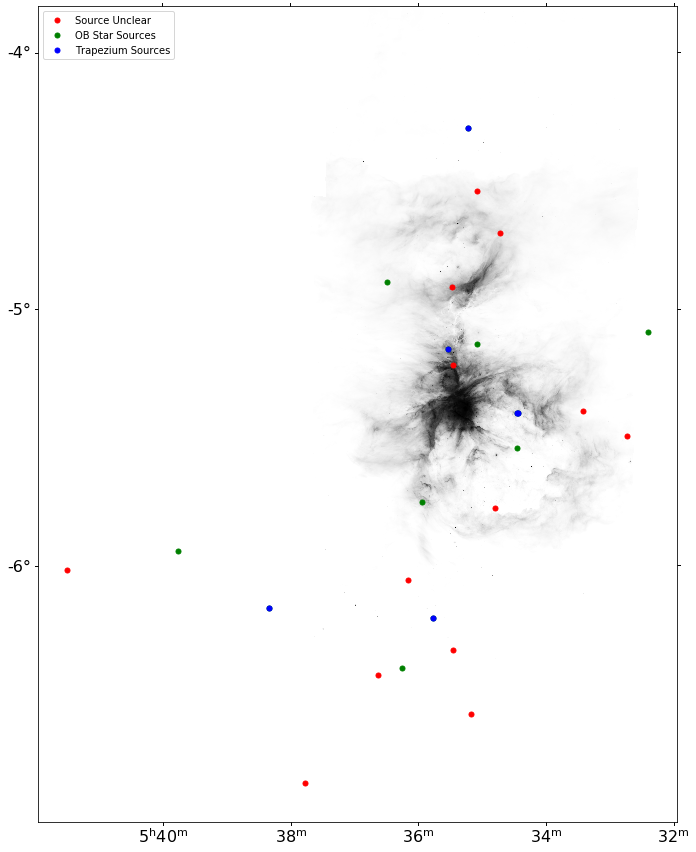

In [4]:
wTrapStars = SkyCoord(wTrap['ra'], wTrap['dec'], unit = 'deg', frame = 'icrs')
wOBStars = SkyCoord(wOB['ra'], wOB['dec'], unit = 'deg', frame = 'icrs')
wOtherStars = SkyCoord(wOther['ra'], wOther['dec'], unit = 'deg', frame = 'icrs')


params = {
    'axes.titlesize' : 24,
    'axes.labelsize' : 20,
    #lines.linewidth : 3,
    #lines.markersize : 10,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16
   }
matplotlib.rcParams.update(params)


fig  = plt.figure(figsize=(15, 15))
ax = plt.subplot(projection = wcs)
ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)

w=1
ax.plot(wOtherStars.ra, wOtherStars.dec, '.', transform = ax.get_transform('icrs'), label = 'Source Unclear',linewidth = w,color = 'r', markersize = 10)
ax.plot(wOBStars.ra, wOBStars.dec,'.',  transform = ax.get_transform('icrs'), label = 'OB Star Sources',linewidth = w, color = 'g',markersize = 10)
ax.plot(wTrapStars.ra, wTrapStars.dec, '.', transform = ax.get_transform('icrs'), label = 'Trapezium Sources',linewidth = w, color = 'b',markersize = 10
       )
plt.legend(loc=2, frameon=True)
plt.show()
#What I need to do is examine the trapezium sources and figure out if there's any that are more likely to interact with an OB star first

#### This is nice and all, but I want them to connect back to a specific source...

In [5]:
#This function translates right ascension and declination into pixels for our given WCS
def transf(ra, dec):
    pos = np.array([ra, dec])
    #mat = np.array([[-0.000339385442203,0.0],[0.0, 0.000339385442203]])
    mat = np.array([[1/-0.000339385442203,0.0],[0.0, 1/0.000339385442203]])
    crval = np.array([83.4643019345, -3.87517570367])
    vec = +pos -crval
    crpix = np.array([2850.0,  7809.0])

    return(np.matmul(mat, vec)+crpix)

def dist(xx1, yy1, xx2, yy2):
    return np.sqrt((xx2-xx1)**2+(yy2-yy1)**2)

In [6]:
def box(coord, mult = 1.5):
    bRa=coord[0].ra
    pRa=coord[1].ra
    bDec = coord[0].dec
    pDec = coord[1].dec
    
    bRa = float(bRa.to_string(decimal = True))
    pRa = float(pRa.to_string(decimal = True))
    bDec = float(bDec.to_string(decimal = True))
    pDec = float(pDec.to_string(decimal = True))
    
    midRa, midDec = ((bRa+pRa)/2, (bDec+pDec)/2)
    print('ras:',bRa, midRa, pRa)
    print('decs:', bDec, midDec, pDec)
    
    constraint = np.max([dist(bRa,bDec, midRa, midDec),dist(pRa,pDec, midRa,midDec)])*mult
#     constraint = np.max([np.abs(np.abs(bRa) - np.abs(midRa)),np.abs(np.abs(pRa) - np.abs(midRa)),np.abs(np.abs(bDec) - np.abs(midDec)),
#                          np.abs(np.abs(pDec) - np.abs(midDec))])
    print('const =',constraint)
    #constraint = 1
    
    lows = transf(midRa+constraint, midDec - constraint)#I THINK this should be +, -; not -, +; for the RA specifically
    highs = transf(midRa-constraint, midDec + constraint)
    
    xx = (lows[0], highs[0])
    yy = (lows[1], highs[1])
    #print(transf(midRa, midDec))
    #print(yy)
#     print('center', midRa, midDec)
#     print('lowbound', midRa + constraint, midDec-constraint)
#     print('highbound', midRa-constraint, midDec + constraint)
    return (xx, yy)

# Trapezium Interactions Here

ras: 83.804 83.81 83.816
decs: -4.29718 -4.84222 -5.38726
const = 0.8176095361479099
xx (-577.6885717216305, 4240.488253074925)
yy (2550.5133044792256, 7368.690129275766)


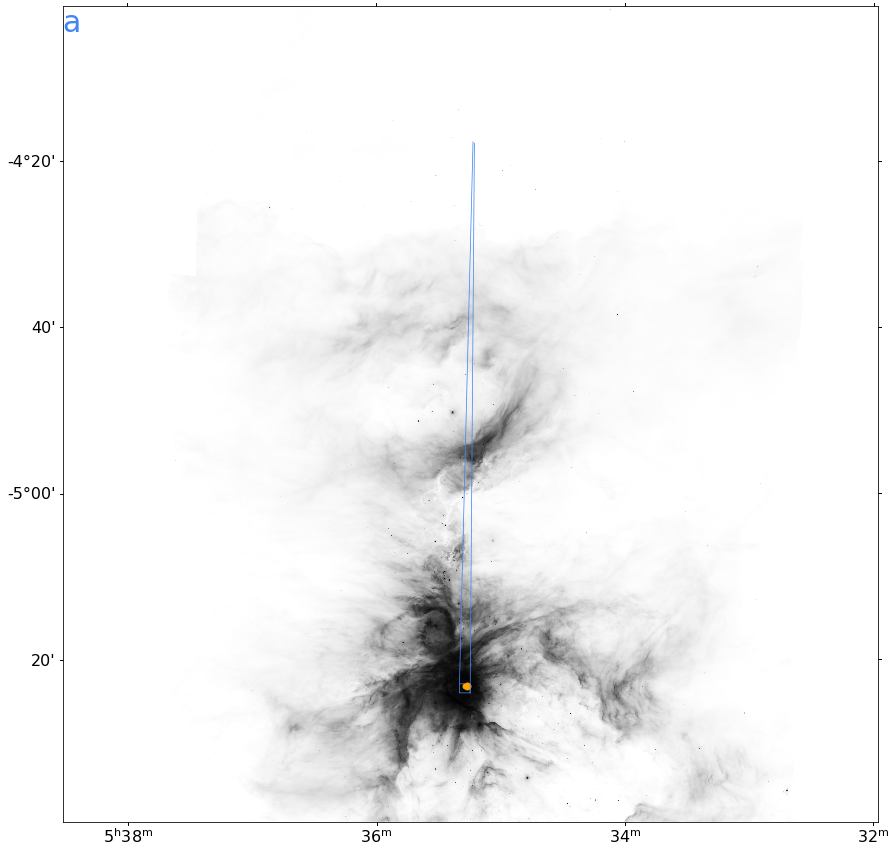

ras: 83.8831 83.84955 83.816
decs: -5.15773 -5.272495 -5.38726
const = 0.17935263416312267
xx (1186.4027166332994, 2243.3286295358657)
yy (3163.332465592169, 4220.258378494729)


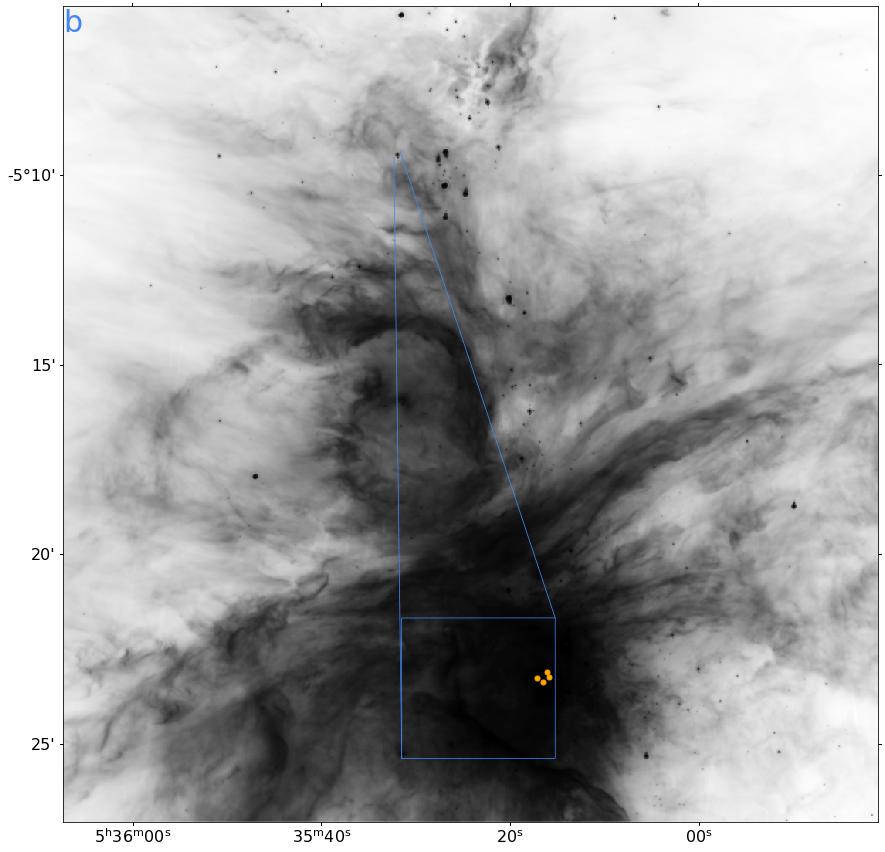

ras: 83.6091 83.71255 83.816
decs: -5.40528 -5.39627 -5.38726
const = 0.1557624340141241
xx (1659.5821173364882, 2577.490870305061)
yy (2868.137718284541, 3786.0464712531298)


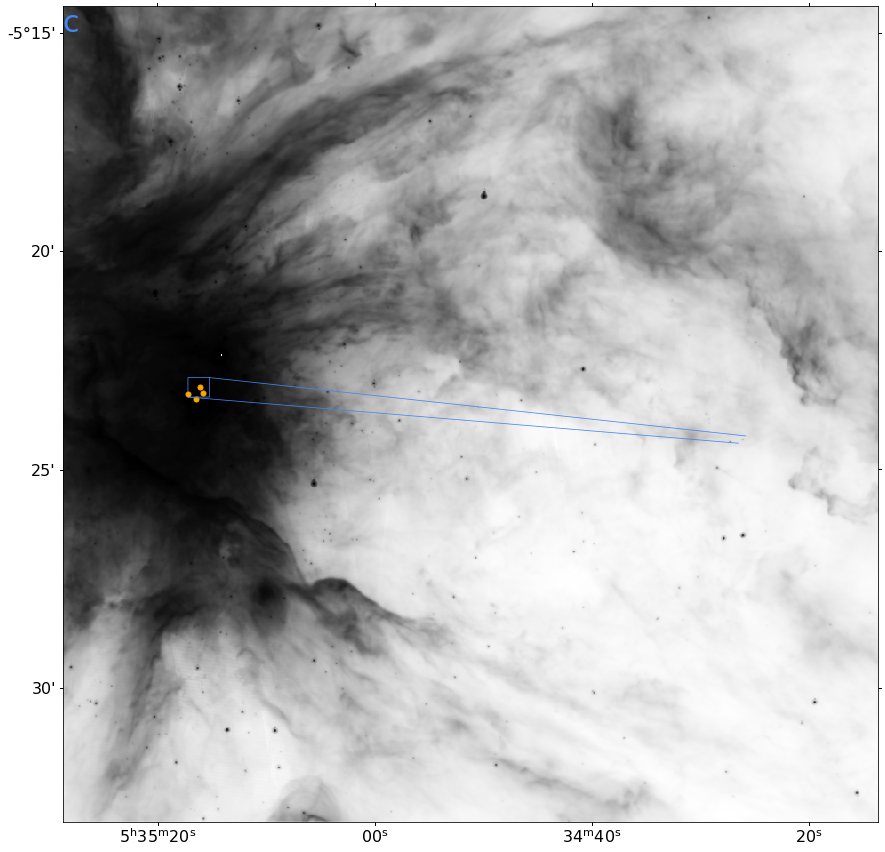

ras: 83.6139 83.71495 83.816
decs: -5.40619 -5.396725 -5.38726
const = 0.15223846304810862
xx (1662.8939004191984, 2560.0358759848277)
yy (2877.180448420798, 3774.3224239864376)


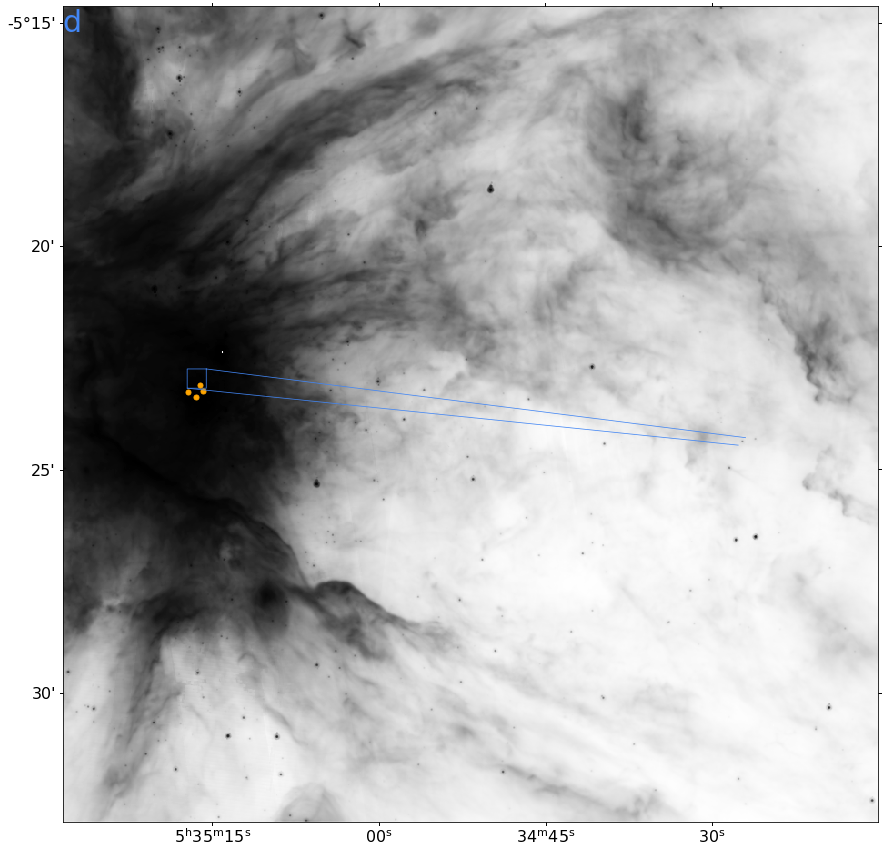

ras: 84.5863 84.20115 83.816
decs: -6.16696 -5.77711 -5.38726
const = 0.8220267491085633
xx (-1743.22829078842, 3100.9791906678547)
yy (-217.1575975590995, 4627.049883897196)


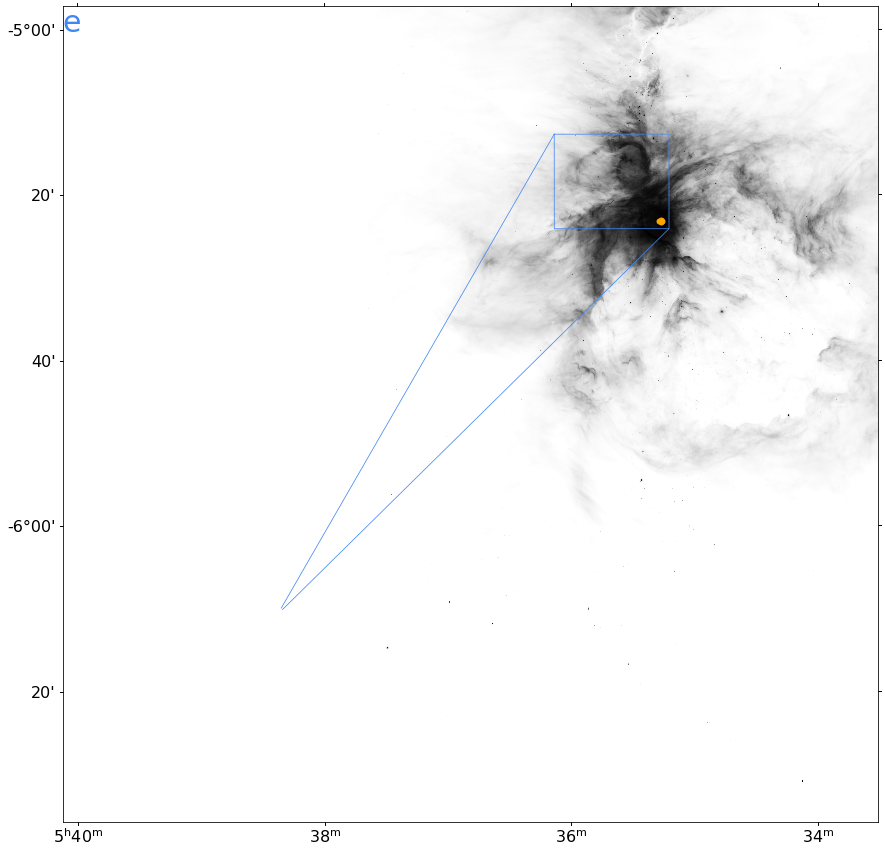

ras: 83.9419 83.87895 83.816
decs: -6.20641 -5.796835 -5.38726
const = 0.6215765134166916
xx (-203.23814772495325, 3459.7151562350255)
yy (315.3497325100934, 3978.3030364700303)


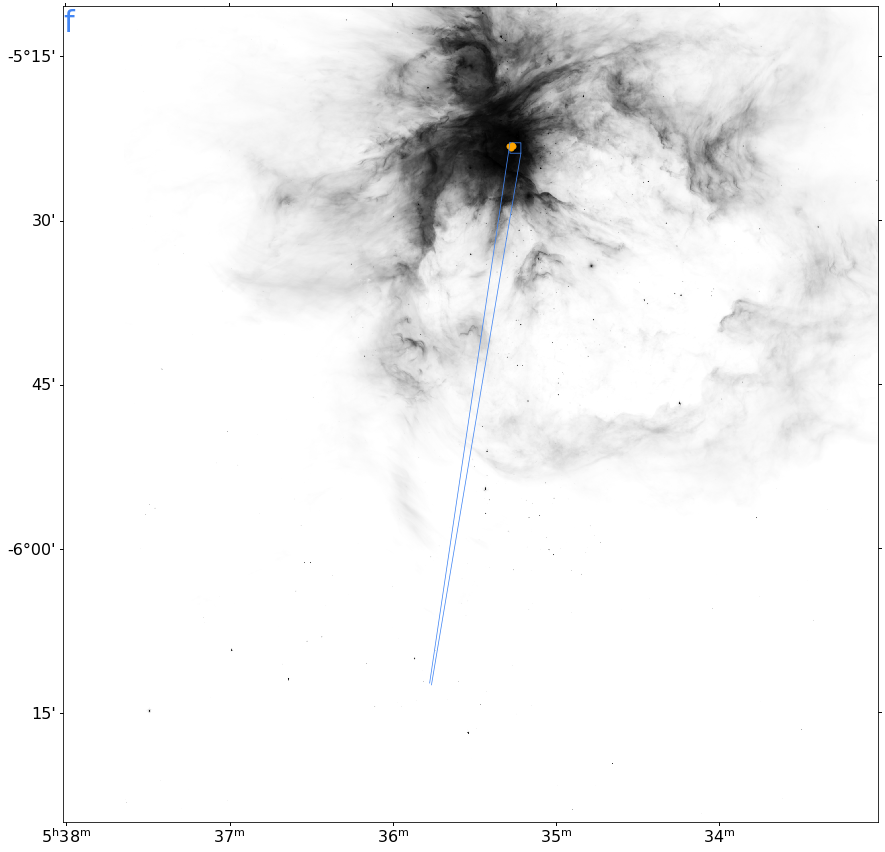

In [43]:
def conePlotTR(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5, times=np.ones(6)):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    trap_ra = float(ra_stat[0].to_string(decimal = True))
    trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #The proper motion alone doesn't cut it, what happens when I average?
    pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #all of this is extra

    d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    #tt = 1000000#myr timestep
    tt = d / pmMag
    
    tt = tt * times
    
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
    if not ra_stat == False:
        stat = SkyCoord(ra_stat,dec_stat, unit = 'deg', frame = 'icrs')
    
    #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')
    
    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= trap_ra
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= trap_dec    
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')
    
    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    for itr in range(len(inTab)):
        anchor = 2 * itr
        off = anchor + 2
        fig  = plt.figure(figsize=(15, 15))
        ax = plt.subplot(projection = wcs)
        ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        #print(capAnchor, capOff)
        
        ax.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = ax.get_transform('icrs'), color ='#4286f4', linewidth =.75)    
        
        if not ra_stat == False:
            ax.plot(stat.ra, stat.dec, 'o', transform = ax.get_transform('icrs'), color = 'orange', markersize = 5)
            
        #ax.plot(ob.ra, ob.dec,'.', transform = ax.get_transform('icrs'))
        
        #xx, yy = box(UP[anchor:off])
        xx, yy = box(straight[anchor:off])
       # print(straight[anchor:off])
        ax.set_xlim(xx)
        ax.set_ylim(yy)
        print('xx', xx)
        print('yy',yy)
        
        ax.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)
        ax.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)
        #ax.get_xlim()
        #ax.set_xlim(-0.5, 3814.5)
        #ax.set_ylim( -0.5, 7962.5)
        
        let = string.ascii_lowercase[itr]
        
        ax.set_title(let, loc = 'left', fontsize = 30, pad = -25, color = '#4286f4')
        
        
        
        
        picname = 'c:\\users\\sahal\desktop\\figures\\plot_'+let+'.jpg'
        plt.savefig(picname)
        plt.show()
        

tlist = np.array([1,1,.85,.88,1.07,1.033])
conePlotTR(wTrap, [thOriA.ra, thOriB.ra, thOriC.ra, thOriD.ra], [thOriA.dec, thOriB.dec, thOriC.dec, thOriD.dec], times = tlist)

In [10]:
closeby = np.array([2,3])
wTrap[closeby]

<Table length=2>
     source_id              designation          ...    RA_2      DEC_2   
       int64                  bytes28            ...  float64    float64  
------------------- ---------------------------- ... ---------- ----------
3209424108758593536 Gaia DR2 3209424108758593536 ... 83.6090833 -5.4052778
3209424108758593408 Gaia DR2 3209424108758593408 ... 83.6139167 -5.4061667

# OB Interactions Here

[ 1  3  4  5  6 11 12]
ras: 84.122 83.9211 83.7202
decs: -4.89754 -4.79924 -4.70094
const = 0.49205152982183525


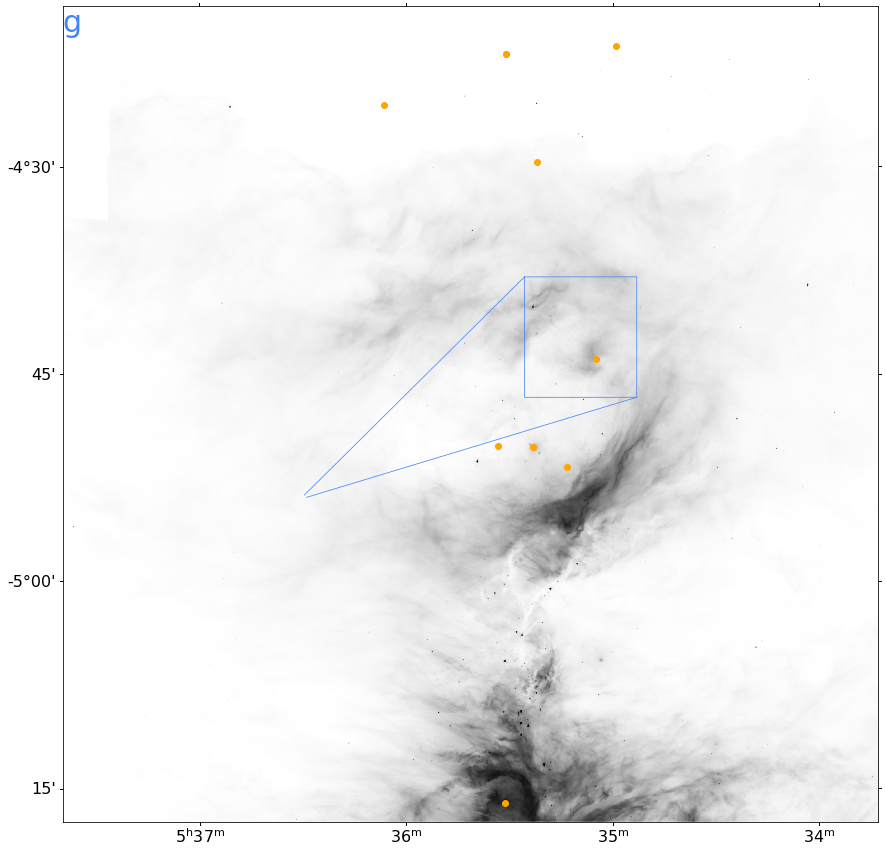

ras: 83.6127 83.71995000000001 83.8272
decs: -5.54145 -5.717295 -5.89314
const = 0.45313605945787144


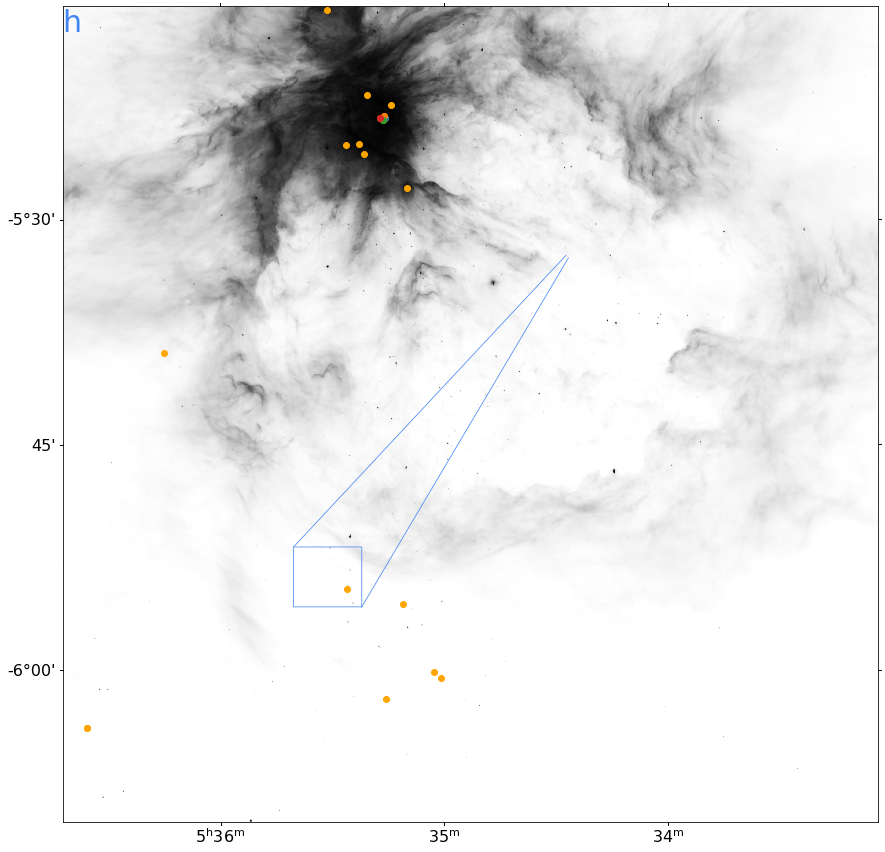

ras: 83.7679 83.76325 83.7586
decs: -5.13684 -5.2651 -5.39336
const = 0.2823573807854152


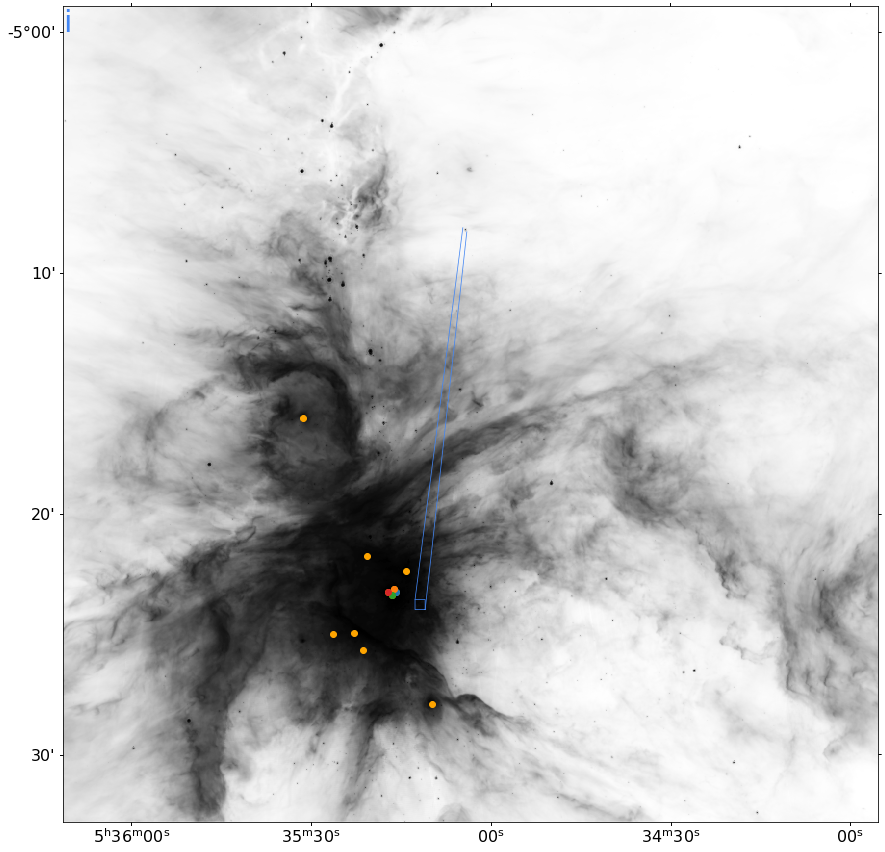

ras: 83.9871 83.85875 83.7304
decs: -5.75533 -5.621955 -5.48858
const = 0.40722358419546006


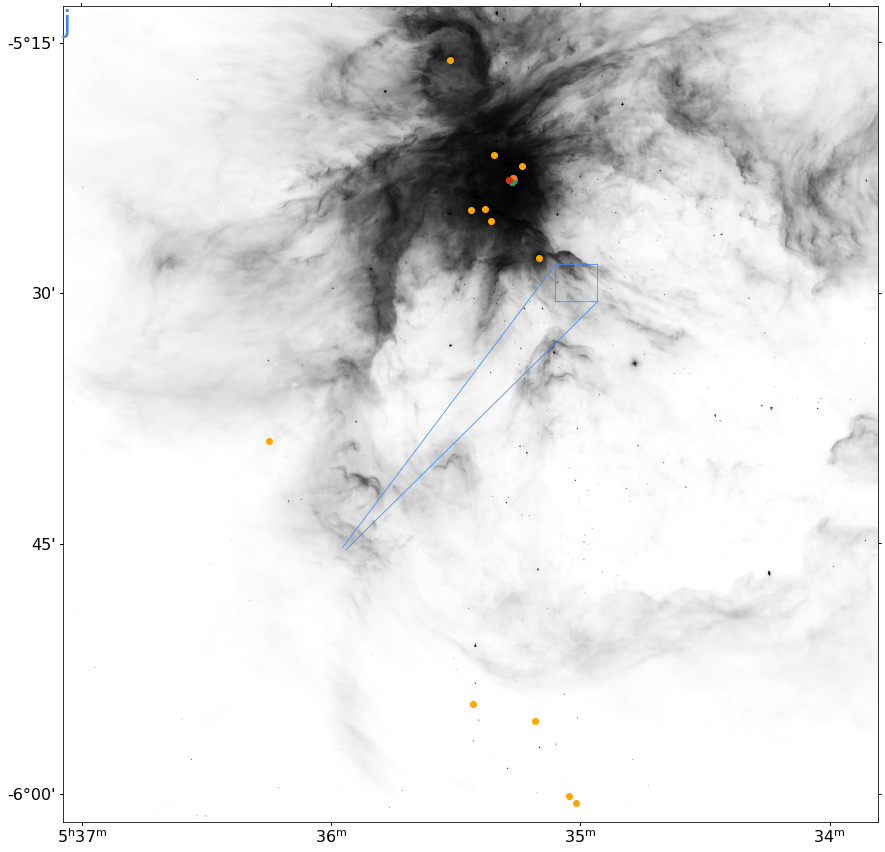

ras: 83.1 83.40805 83.7161
decs: -5.08984 -5.22751 -5.36518
const = 0.7423095742182136


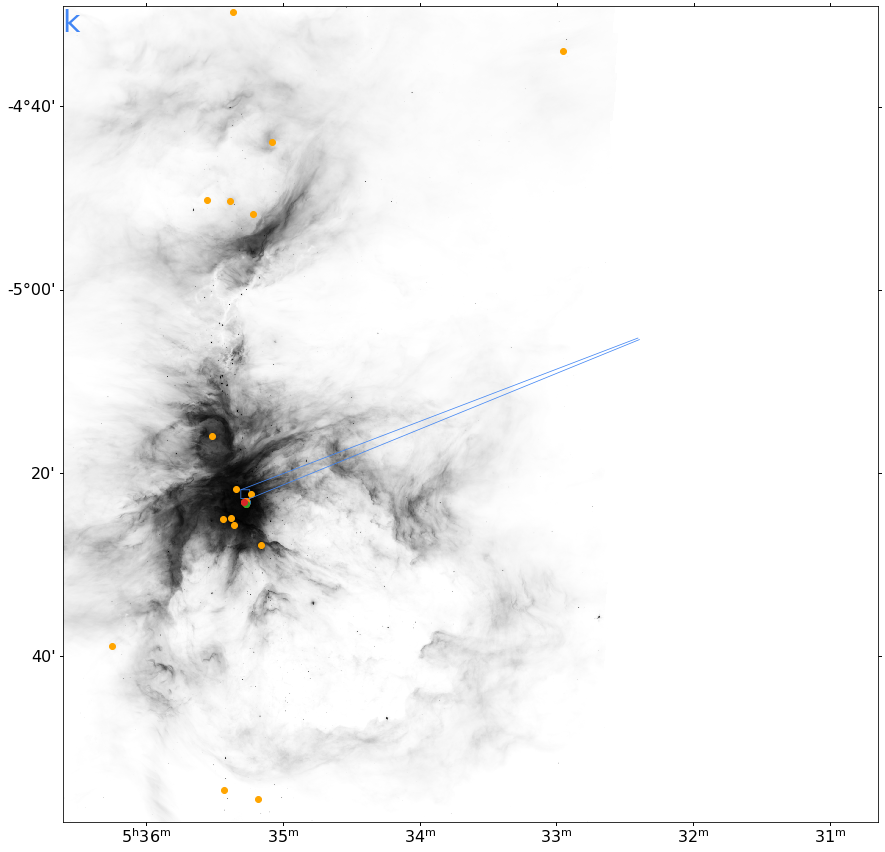

ras: 84.9426 84.27935 83.6161
decs: -5.94414 -6.016195 -6.08825
const = 1.4677355449606828


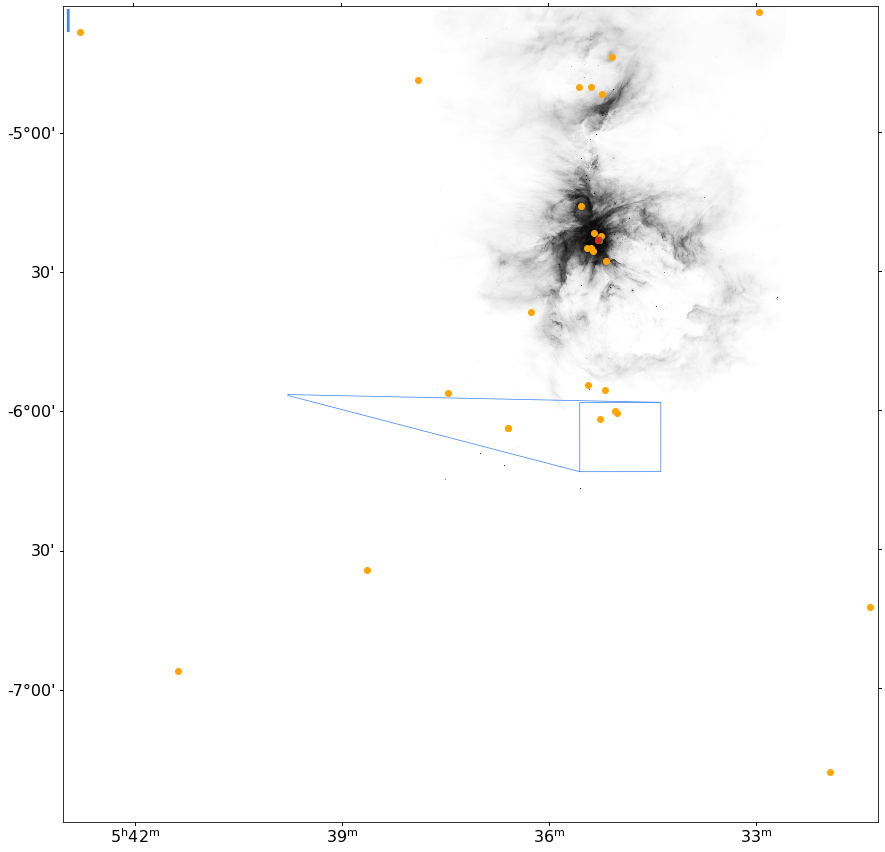

ras: 84.0635 83.87885 83.6942
decs: -6.39883 -6.201370000000001 -6.00391
const = 0.5947575965416579


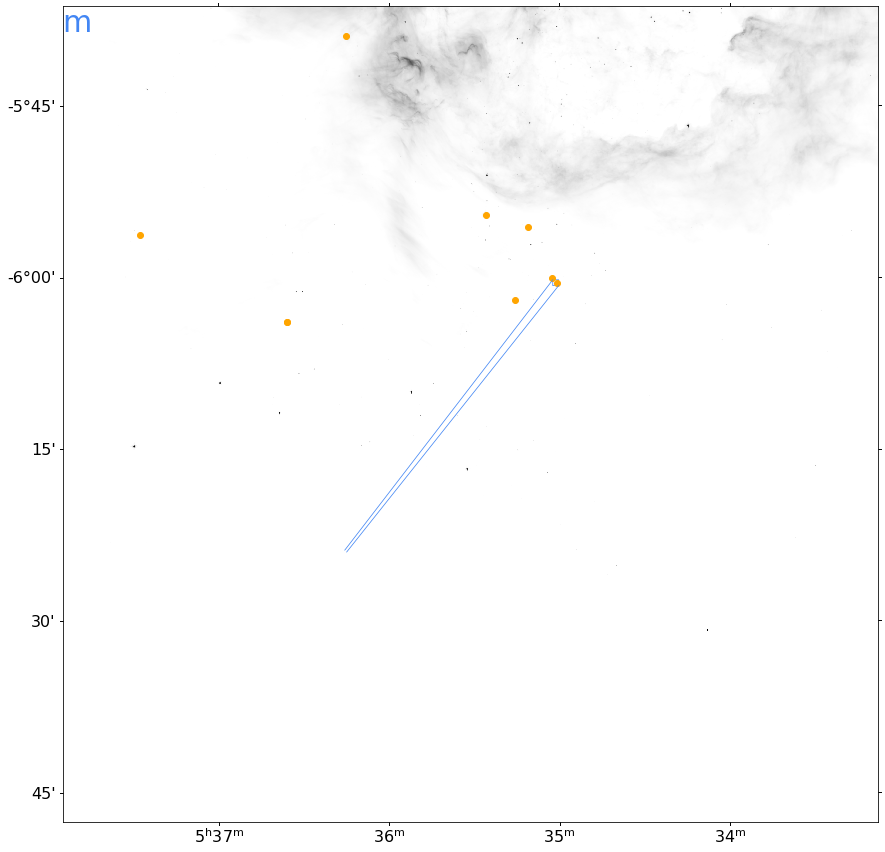

In [44]:
trpINOB=[0, 2, 7, 8, 9, 10]
otherInds = np.delete(np.arange(len(wOB)), trpINOB)
print(otherInds)

def conePlotOB(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5, tmult = np.ones(len(otherInds))):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #trap_ra = float(ra_stat[0].to_string(decimal = True))
    #trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    tt = 1000000 * tmult#myr timestep
    #tt = d / pmMag

    
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]
    
    strRa = np.zeros(2 * len(inTab))
    strRa[0::2] = inTab['ra']
    strRa[1::2]= inTab['ra']-tt * inTab['pmra']*cvt
    strDec = np.zeros(2 * len(inTab))
    strDec[0::2] = inTab['dec']
    strDec[1::2]= inTab['dec']-tt*inTab['pmdec']*cvt
    straight = SkyCoord(strRa, strDec, unit = 'deg', frame = 'icrs')

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')
    
    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    
    
    #definiteTrap=[]
    for itr in range(len(inTab)):
        anchor = 2 * itr
        off = anchor + 2
        fig  = plt.figure(figsize=(15, 15))
        ax = plt.subplot(projection = wcs)
        ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        #print(capAnchor, capOff)
        
        xx, yy = box(straight[anchor:off], mult = 2.2)
        ax.set_xlim(xx)
        ax.set_ylim(yy)
        
        ax.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = ax.get_transform('icrs'), color ='#4286f4', linewidth =.75)
        
        ax.plot(ob.ra, ob.dec, 'o', transform = ax.get_transform('icrs'), color = 'orange', linewidth =1)
        
        #INTRODUCE trapezium sources to weed out choices
        ax.plot(thOriA.ra,thOriA.dec, 'o', transform = ax.get_transform('icrs'), linewidth = 1)
        ax.plot(thOriB.ra,thOriB.dec, 'o', transform = ax.get_transform('icrs'), linewidth = 1)
        ax.plot(thOriC.ra,thOriC.dec, 'o', transform = ax.get_transform('icrs'), linewidth = 1)
        ax.plot(thOriD.ra,thOriD.dec, 'o', transform = ax.get_transform('icrs'), linewidth = 1)
        
        if inTab['source_id'][itr] in wTrap['source_id']:
            ax.set_title('CONFIRMED FOR TRAPEZIUM')
            #definiteTrap.append(itr)
        
        #for the rest: [0, 2, 7, 8, 9, 10] interact with trapezium already
        #of this list: 2, 4 close to trapezium, 3 somewhat close
        #corresponds to 7, 9; 8 from wOB table
    
        
        
        ax.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)
        ax.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)

        
        let = string.ascii_lowercase[itr+6]
        
        ax.set_title(let, loc = 'left', fontsize = 30, pad = -25, color = '#4286f4')
        
        
        
        
        figname = 'c:\\users\\sahal\\desktop\\figures\\plot'+let+'.jpg'#IN ORDER TO SAVE AS A JPG YOU MUST HAVE PILLOW INSTALLED
        plt.savefig(figname)
        plt.show()
        
conePlotOB(wOB[otherInds], OBTab['ra'], OBTab['dec'],
          tmult = np.array([.22,.17,.13,.075,.33,.4,.1965]))#putting in otherInds excludes confirmed trapezium stars

In [ ]:
#This last plot seems to originate from iota ori

# Others here

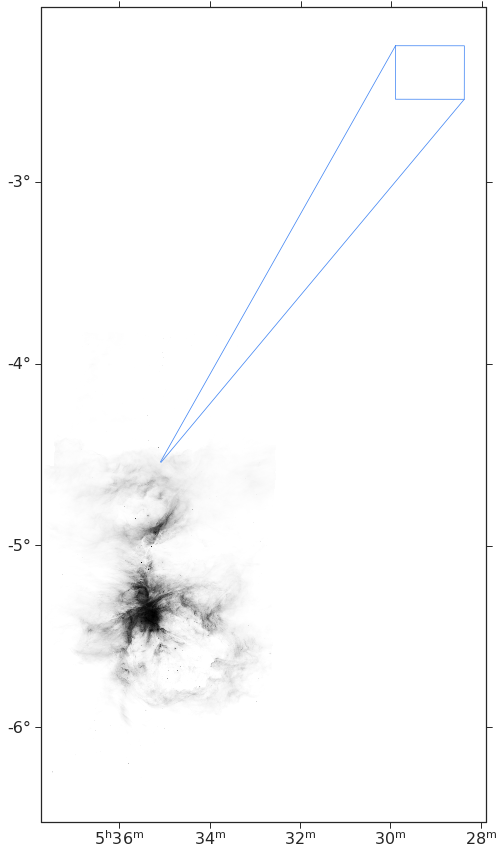

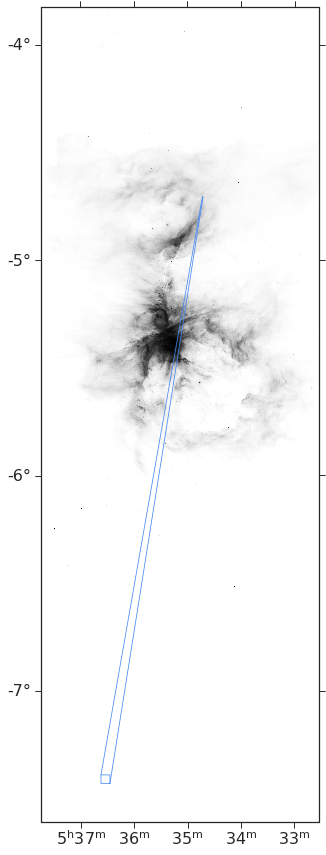

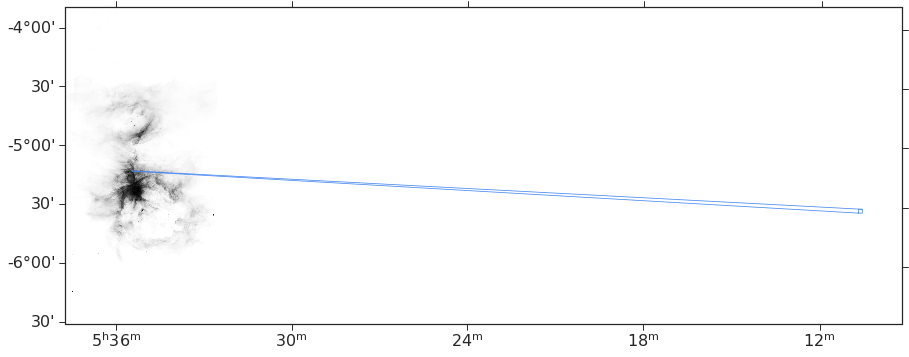

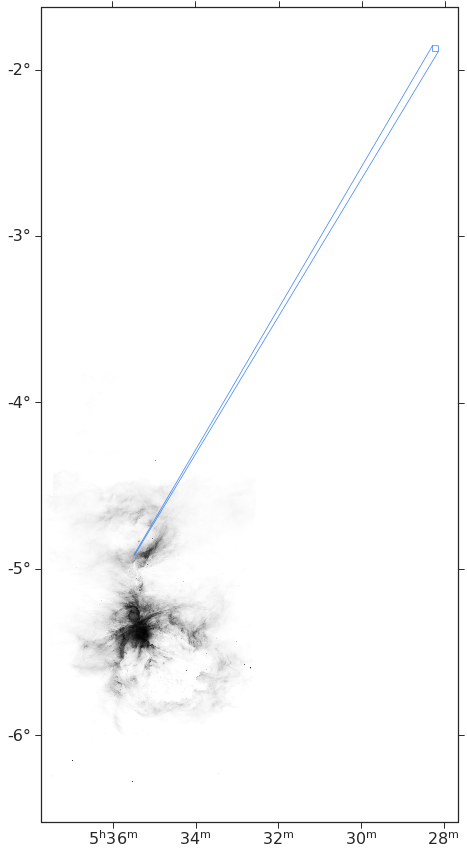

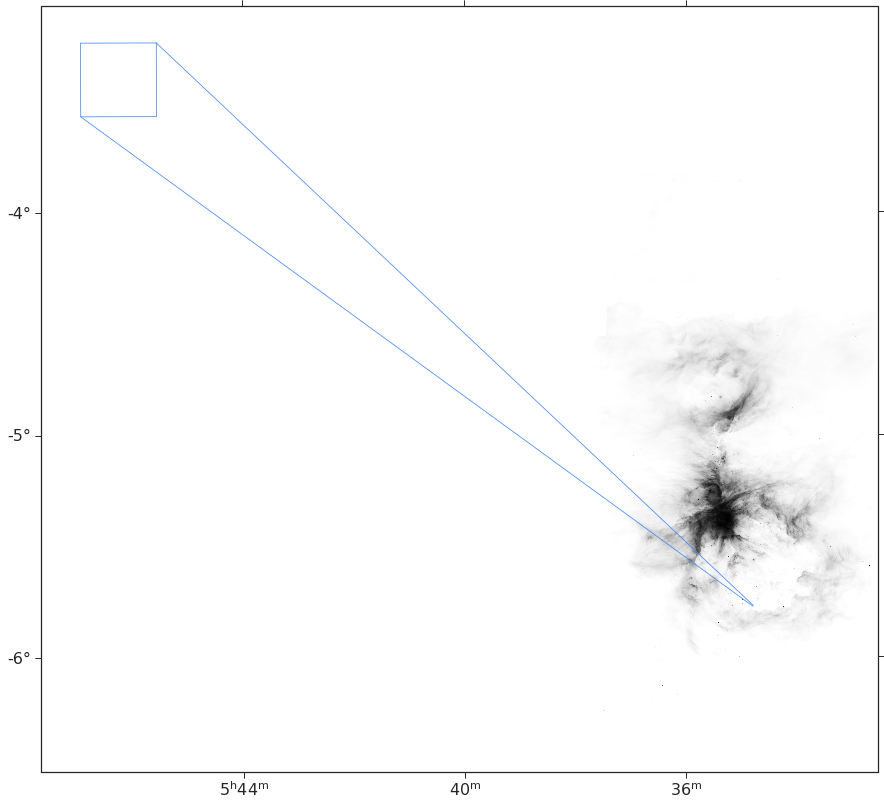

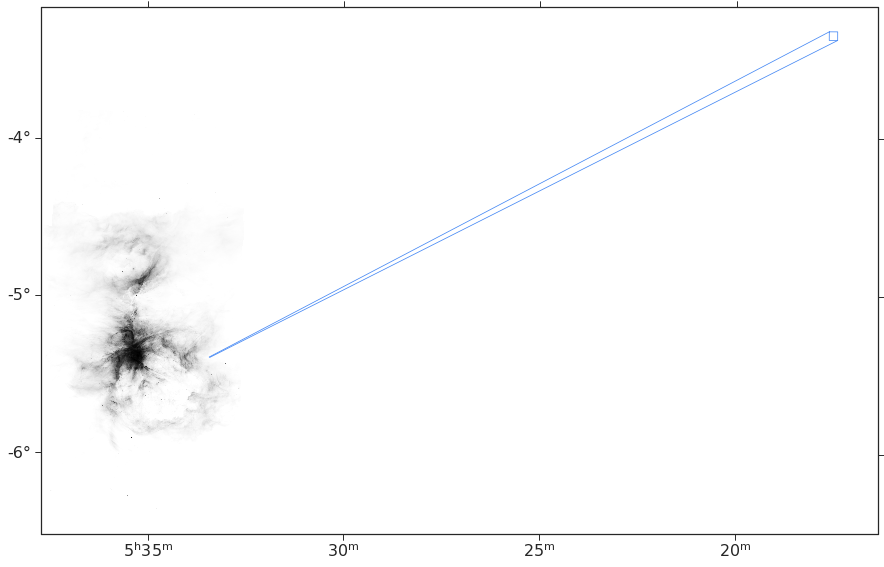

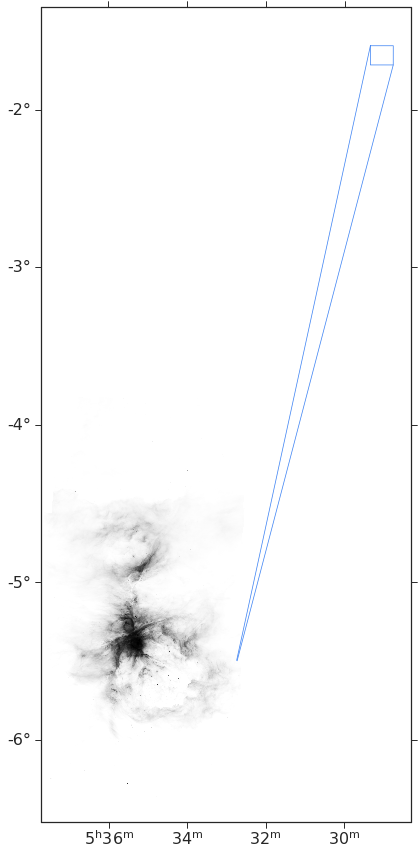

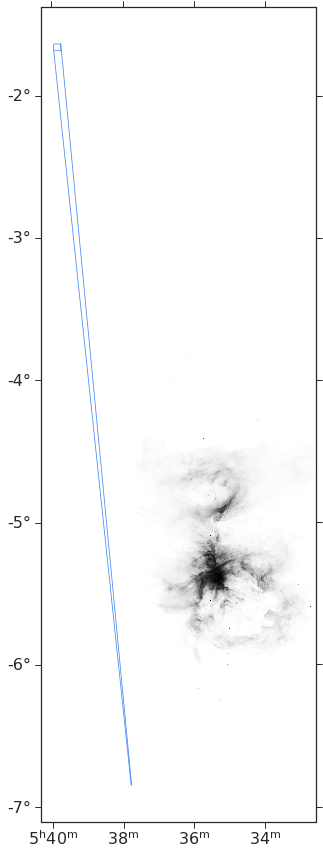

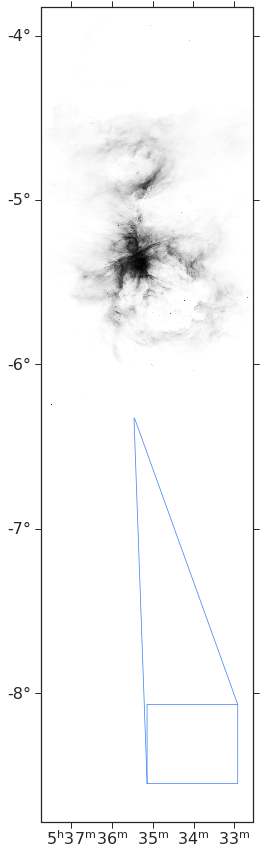

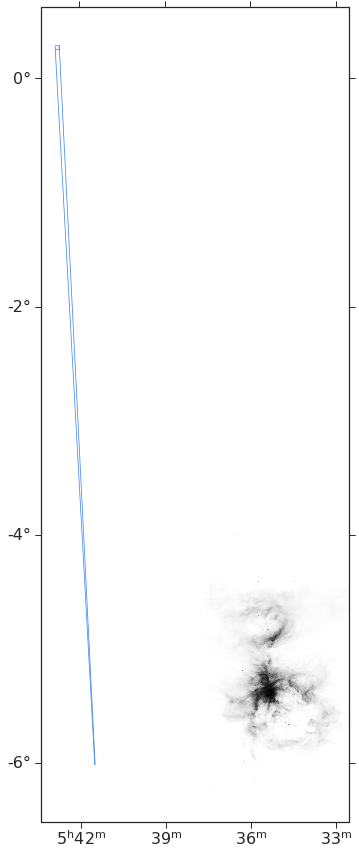

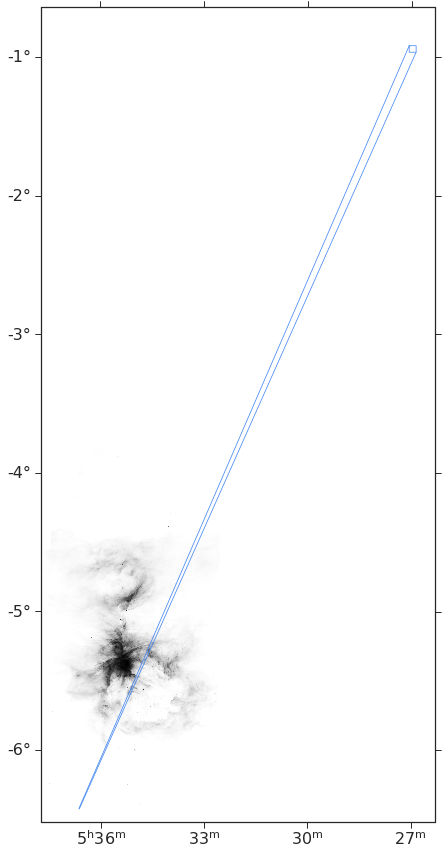

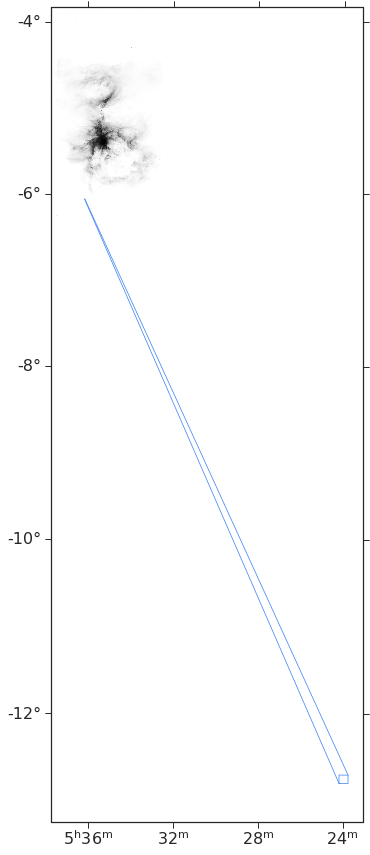

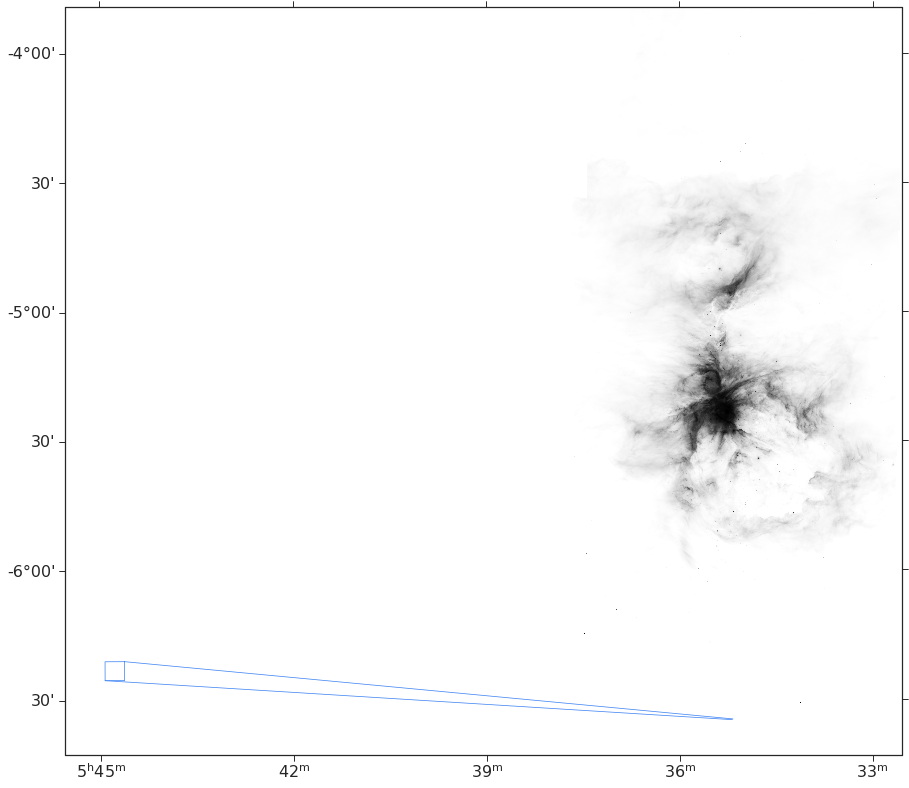

In [106]:
def conePlotOther(inTab, ra_stat=False, dec_stat=False, offsetMultiplier = 5):
    arc = 1/3600 #arcsecond in degrees
    cvt = arc/1000 #miliarcseconds to deg
    pmraAvg = np.mean(gaiaConfTab['pmra'])
    pmdecAvg = np.mean(gaiaConfTab['pmdec'])
    #gets the average proper motion of all stars confirmed and with gaia data too
    
    pmra_corr = -(inTab['pmra']-pmraAvg)*cvt
    pmdec_corr = -(inTab['pmdec']-pmdecAvg)*cvt
    
    absPmra = np.abs(pmra_corr)
    absPmdec = np.abs(pmdec_corr)
    signPmra = np.sign(pmra_corr)
    signPmdec = np.sign(pmdec_corr)
    
    maxPmra = absPmra - inTab['pmra_err']*cvt
    maxPmdec = absPmdec + inTab['pmdec_err']*cvt

    minPmra = absPmra + inTab['pmra_err']*cvt
    minPmdec = absPmdec - inTab['pmdec_err']*cvt
    
    optMaxPmra = maxPmra * signPmra 
    optMaxPmdec = maxPmdec * signPmdec
    
    optMinPmra = minPmra * signPmra
    optMinPmdec = minPmdec * signPmdec   
    
    raUpOffset = inTab['ra'] - offsetMultiplier * arc * signPmra
    decUpOffset = inTab['dec'] + offsetMultiplier * arc * signPmdec
    
    raDownOffset = inTab['ra'] + offsetMultiplier * arc * signPmra
    decDownOffset = inTab['dec'] - offsetMultiplier * arc * signPmdec
    #effectively, this draws a box around the initial position and selects the corners with the widest spread
    
    #trap_ra = float(ra_stat[0].to_string(decimal = True))
    #trap_dec = float(dec_stat[0].to_string(decimal = True))
    
    #pmMag = np.sqrt(inTab['pmra']**2+inTab['pmdec']**2)*cvt
    #d = np.sqrt((inTab['ra'] - trap_ra)**2+(inTab['dec']-trap_dec)**2)
    
    tt = 1000000#myr timestep
    #tt = d / pmMag

    
    projRaUp  = raUpOffset + tt * optMaxPmra
    projDecUp  = decUpOffset + tt * optMaxPmdec
    projRaDown  = raDownOffset + tt * optMinPmra
    projDecDown = decDownOffset + tt * optMinPmdec    
        
    Ura = np.zeros(2*len(inTab))
    Ura[0::2]=raUpOffset
    Ura[1::2]=projRaUp
    Dra = np.zeros(2*len(inTab))
    Dra[0::2]=raDownOffset
    Dra[1::2]=projRaDown

    Udec = np.zeros(2*len(inTab))
    Udec[0::2]=decUpOffset
    Udec[1::2]=projDecUp
    Ddec = np.zeros(2*len(inTab))
    Ddec[0::2]=decDownOffset
    Ddec[1::2]=projDecDown
    
    #These are organized where all even indices are base
    #all odd indices are projected back
    UP = SkyCoord(Ura, Udec, unit = 'deg', frame = 'icrs')
    DOWN = SkyCoord(Dra, Ddec,unit = 'deg', frame = 'icrs')
    
        #make a box/cap
    RAcap = np.zeros(5 * len(inTab))
    RAcap[0::5]= projRaUp
    RAcap[1::5]= projRaUp
    RAcap[2::5] = projRaDown
    RAcap[3::5] = projRaDown
    RAcap[4::5] = RAcap[0::5]
    
    
    DECcap = np.zeros(5 * len(inTab))
    DECcap[0::5]= projDecUp
    DECcap[1::5]= projDecDown
    DECcap[2::5] = projDecDown
    DECcap[3::5] = projDecUp
    DECcap[4::5] = DECcap[0::5]

    cap = SkyCoord(RAcap, DECcap, unit = 'deg', frame = 'icrs')
    
    ob = SkyCoord(OBTab['ra'], OBTab['dec'], unit = 'deg', frame = 'icrs')
    for itr in range(len(inTab)):
        anchor = 2 * itr
        off = anchor + 2
        fig  = plt.figure(figsize=(15, 15))
        ax = plt.subplot(projection = wcs)
        ax.imshow(np.arctan(0.0001*(hdu.data-np.median(hdu.data))), origin='lower',cmap='binary',vmin=0)
        
        capAnchor = 5 * itr
        capOff = capAnchor + 5
        #print(capAnchor, capOff)
        
        ax.plot(cap[capAnchor:capOff].ra, cap[capAnchor:capOff].dec,transform = ax.get_transform('icrs'), color ='#4286f4', linewidth =.75)
        #ax.plot(ob.ra, ob.dec, '.', transform = ax.get_transform('icrs'), color = 'orange', linewidth = 1)
        
        ax.plot(UP[anchor:off].ra,UP[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)
        ax.plot(DOWN[anchor:off].ra, DOWN[anchor:off].dec, transform = ax.get_transform('icrs'), color = '#4286f4', linewidth = .75)
#         ax.set_xlim(-0.5, 3814.5)
#         ax.set_ylim( -0.5, 7962.5)
        #ax.axis('scaled')
        #ax.axis('equal')
        plt.show()

conePlotOther(wOther, thOriA.ra, thOriA.dec)

In [7]:
b = SkyCoord(wOB['ra'], wOB['dec'], unit='deg', frame = 'icrs')